<a href="https://colab.research.google.com/github/josegerman/machine-learning/blob/main/PyCaret_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Regression Project using PyCaret ML library**<br>
By: Jose German

# Install requirements

In [1]:
# install pycaret; full installation including dependancies
#pip install pycaret[full]

# install pycaret plus all dependencies
# visual studio code recommends to use %pip instead fo !pip
%pip install pycaret

Using legacy 'setup.py install' for pyod, since package 'wheel' is not installed.
    Running setup.py install for pyod: started
    Running setup.py install for pyod: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\joseg\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
# Install MLFlow
# This library manages the ML project; It also used to track parameters, metrics, hyperparameters, feature parameters, code versions, etc
%pip install mlflow

You should consider upgrading via the 'c:\Users\joseg\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: pytz
    Found existing installation: pytz 2024.1
    Uninstalling pytz-2024.1:
      Successfully uninstalled pytz-2024.1


# Imports

In [1]:
# check installed version; should be 3.0 or newer
import pycaret
pycaret.__version__

'3.2.0'

In [2]:
import pandas as pd

# Loading dataset

In [3]:
#housedata = pd.read_csv('/content/new_train.csv')
housedata = pd.read_csv('C:\\Users\\joseg\\OneDrive\\Git\\machine-learning\\data\\new_train.csv') #vsc path
housedata.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Exterior_BrkFace,Exterior_VinylSd,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_ImStucc,Exterior_CBlock,Exterior_Stucco,Exterior_BrkComm,Exterior_WdShing
0,1,2-STORY 1946+,RL,65.0,8450,NaN,0,Lvl,Inside,0,...,0,1,0,0,0,0,0,0,0,0
1,2,1-STORY 1946+,RL,80.0,9600,NaN,0,Lvl,FR2,0,...,0,0,0,1,0,0,0,0,0,0
2,3,2-STORY 1946+,RL,68.0,11250,NaN,1,Lvl,Inside,0,...,0,1,0,0,0,0,0,0,0,0
3,4,2-STORY 1945-,RL,60.0,9550,NaN,1,Lvl,Corner,0,...,0,0,0,0,0,0,0,0,0,1
4,5,2-STORY 1946+,RL,84.0,14260,NaN,1,Lvl,FR2,0,...,0,1,0,0,0,0,0,0,0,0


# Initial setup

In [4]:
from pycaret.regression import *
reg1 = setup(housedata, target='SalePrice', session_id=123, log_experiment=True, experiment_name='houseprice1')

# Below code line is similar to above except here we don't need MLFLow to log the experiment
#reg1 = setup(housedata, target='SalePrice', session_id=123)


,Description,Value
0,Session id,123
1,Target,SalePrice
2,Target type,Regression
3,Original data shape,"(1456, 98)"
4,Transformed data shape,"(1456, 213)"
5,Transformed train set shape,"(1019, 213)"
6,Transformed test set shape,"(437, 213)"
7,Ordinal features,1
8,Numeric features,79
9,Categorical features,18


# Compare model baselines
Compare models function trains and evaluates the performance of al the estimators available in the model library using cross validation. The output is a scoring grid with average cross validated scored.

In [5]:
best_model = compare_models(fold=5)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,15945.6097,572501405.8010,23691.7101,0.9070,0.1288,0.0946,0.2040
lightgbm,Light Gradient Boosting Machine,15988.9805,584902671.4449,23923.6088,0.9052,0.1325,0.0947,0.1840
br,Bayesian Ridge,17278.5329,612508039.2934,24590.3782,0.8993,0.1672,0.1066,0.1040
ridge,Ridge Regression,17890.8806,649887225.9588,25397.4775,0.8918,0.1637,0.1094,0.0860
llar,Lasso Least Angle Regression,17771.1387,661057728.1356,25526.4346,0.8910,0.1755,0.1087,0.0960
et,Extra Trees Regressor,17285.7992,722876373.3781,26497.6837,0.8839,0.1417,0.1025,0.3180
rf,Random Forest Regressor,17577.0082,737918314.4469,26877.6747,0.8802,0.1444,0.1045,0.4060
lasso,Lasso Regression,18634.2618,729186390.9582,26868.2343,0.8786,0.1876,0.1140,0.4260
en,Elastic Net,18713.2707,775653903.5853,27572.5373,0.8735,0.1714,0.1144,0.1120
ada,AdaBoost Regressor,23012.2866,1018608601.4574,31770.3996,0.8315,0.1878,0.1487,0.1500


`compare_model` uses all estimators in model library except models with `Turbo=False`. `models()` will list all available modelss.

In [7]:
# Show best model
best_model

GradientBoostingRegressor(random_state=123)

# Analyze model
Plot model function analyzes the performance of the trained model ona test test.

In [ ]:
# Check help for available plots
#help(plot_model)

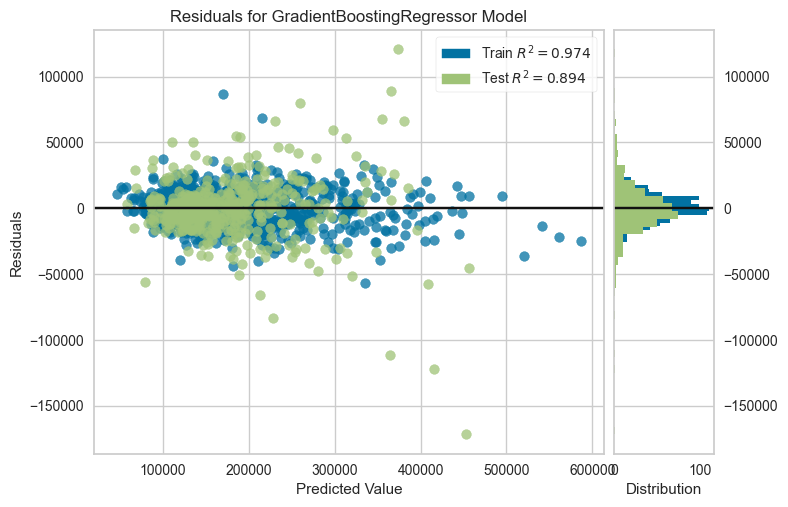

In [11]:
# Lets plot residuals
plot_model(best_model, plot='residuals')

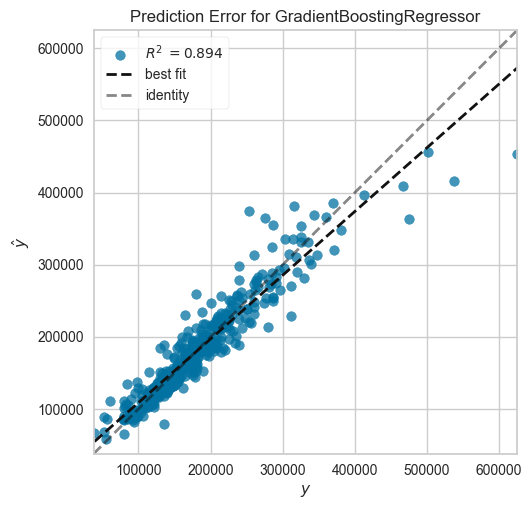

In [15]:
# Lets plot the errors
plot_model(best_model, plot='error')

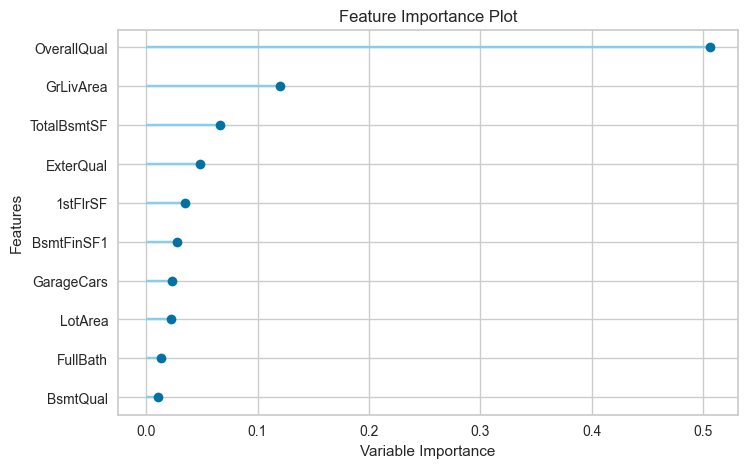

In [16]:
# Lets plot feature importance
plot_model(best_model, plot='feature')

# Create model

CatBoost Regressor used here which is the best model.

In [6]:
# Train model with default fold=10
gbr = create_model(best_model)

# Similar as above code line with specific number of folds
#lightgbm = create_model('lightgbm', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17498.3694,650239095.9561,25499.7862,0.9124,0.1463,0.1016
1,15870.8813,534550655.3307,23120.3515,0.8952,0.1264,0.0893
2,15003.7861,582869057.8918,24142.6812,0.8926,0.1313,0.0929
3,13405.1615,300714638.2514,17341.1256,0.9309,0.1160,0.0922
4,15583.4846,499977611.3820,22360.1791,0.9173,0.1457,0.1062
5,15609.6168,546441599.0758,23376.0903,0.8872,0.1268,0.0935
6,19851.6507,1078665656.0713,32843.0458,0.8745,0.1366,0.1001
7,18495.3262,740514564.7862,27212.3973,0.9084,0.1394,0.1040
8,13305.2140,367276253.2254,19164.4529,0.9341,0.0988,0.0756


`compare_models` allows specific models to be compared.

In [7]:
# Create secondary model to illustrate interpret_model fuction futher below in code
lightgbm = create_model('lightgbm', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17313.5703,684982486.0748,26172.1701,0.8810,0.1475,0.1053
1,16835.3732,699070473.8018,26439.9409,0.8914,0.1463,0.1055
2,17612.3739,646189116.2587,25420.2501,0.8937,0.1278,0.0974
Mean,17253.7725,676747358.7118,26010.7870,0.8887,0.1406,0.1027
Std,320.0150,22360269.6155,431.6447,0.0055,0.0090,0.0038


In [18]:
# Compare top 3 models
compare_regression_models = compare_models(include = ['lightgbm','gbr','br'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,15913.6430,569802994.5714,23497.9468,0.9072,0.1271,0.0936,0.2190
lightgbm,Light Gradient Boosting Machine,15840.4086,599847158.2994,24115.8241,0.9019,0.1296,0.0923,0.2000
br,Bayesian Ridge,17023.1121,602768043.5373,24251.4893,0.9005,0.1555,0.1046,0.0810


In [19]:
# Show best model from the top 3 specified in previous cell
compare_regression_models

GradientBoostingRegressor(random_state=123)

By default `compare_models` return the single best performing model (as seen in above cell) based on a defined metric.

In [20]:
# Get top 3 model based on MAE
best_mae_models_top3 = compare_models(sort = 'MAE', n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,15840.4086,599847158.2994,24115.8241,0.9019,0.1296,0.0923,0.1690
gbr,Gradient Boosting Regressor,15913.6430,569802994.5714,23497.9468,0.9072,0.1271,0.0936,0.2140
et,Extra Trees Regressor,16728.4045,686751269.1948,25597.2773,0.8902,0.1372,0.0992,0.3360
br,Bayesian Ridge,17023.1121,602768043.5373,24251.4893,0.9005,0.1555,0.1046,0.0820
rf,Random Forest Regressor,17399.4334,724943270.4423,26530.0009,0.8819,0.1439,0.1038,0.4430
ridge,Ridge Regression,17643.4393,641884014.1194,25102.1106,0.8932,0.1598,0.1078,0.0760
llar,Lasso Least Angle Regression,18082.0516,710432169.9676,26112.0967,0.8842,0.1790,0.1111,0.0840
lasso,Lasso Regression,18414.3339,726802556.3385,26585.1069,0.8798,0.1797,0.1126,0.1010
en,Elastic Net,18614.2696,765237601.7318,27277.5805,0.8740,0.1680,0.1133,0.1140
omp,Orthogonal Matching Pursuit,21509.2864,982635388.9790,31040.8348,0.8366,0.2248,0.1351,0.0770


In [21]:
best_mae_models_top3

[LGBMRegressor(n_jobs=-1, random_state=123),
 GradientBoostingRegressor(random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [22]:
# Train linear regression with specific model parameters

#create_model('catboost', fit_intercept = False) #fit_intercept applies to LGBMRegressor
create_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17498.3694,650239095.9561,25499.7862,0.9124,0.1463,0.1016
1,15870.8813,534550655.3307,23120.3515,0.8952,0.1264,0.0893
2,15003.7861,582869057.8918,24142.6812,0.8926,0.1313,0.0929
3,13405.1615,300714638.2514,17341.1256,0.9309,0.1160,0.0922
4,15583.4846,499977611.3820,22360.1791,0.9173,0.1457,0.1062
5,15609.6168,546441599.0758,23376.0903,0.8872,0.1268,0.0935
6,19851.6507,1078665656.0713,32843.0458,0.8745,0.1366,0.1001
7,18495.3262,740514564.7862,27212.3973,0.9084,0.1394,0.1040
8,13305.2140,367276253.2254,19164.4529,0.9341,0.0988,0.0756


GradientBoostingRegressor(random_state=123)

# Tune hyperparameters

In [23]:
#tuned_lightgbm = tune_model(lightgbm, n_iter=50, optimize='MAE')

# Default parameters
tuned_gbr = tune_model(gbr)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,19188.5211,802334483.7404,28325.5094,0.8919,0.1632,0.1137
1,16670.4781,603049093.0453,24557.0579,0.8817,0.1341,0.0956
2,16253.5036,605125670.5620,24599.3022,0.8885,0.1366,0.1001
3,15098.2791,456229148.8536,21359.5213,0.8952,0.1251,0.0969
4,16100.2798,528400666.2846,22986.9673,0.9126,0.1468,0.1079
5,15006.8385,556663396.3197,23593.7152,0.8851,0.1297,0.0919
6,19898.3755,1055401789.8293,32486.9480,0.8772,0.1408,0.1033
7,18884.8108,829539284.6239,28801.7236,0.8974,0.1518,0.1085
8,16236.2855,586286085.9541,24213.3452,0.8948,0.1126,0.0857


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [24]:
# Show tuned hyperparameters
tuned_gbr

GradientBoostingRegressor(random_state=123)

In [ ]:
#help(tune_model)

# Ensemble model
Ensemble model function enables a given estimator.

In [25]:
gbr_dt = ensemble_model(gbr, n_estimators=50)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,16842.0559,681300174.7372,26101.7274,0.9082,0.1449,0.0980
1,15749.3193,514146741.9613,22674.8041,0.8992,0.1248,0.0891
2,14534.1331,542353315.2277,23288.4803,0.9000,0.1289,0.0908
3,12425.5191,255122377.9630,15972.5508,0.9414,0.1183,0.0879
4,14826.9493,426807033.3867,20659.3086,0.9294,0.1424,0.1026
5,14206.0884,500672176.7429,22375.7051,0.8967,0.1217,0.0866
6,18764.2244,961738440.2359,31011.9080,0.8881,0.1305,0.0967
7,17829.2851,706009999.7576,26570.8487,0.9127,0.1408,0.1033
8,12920.9215,369733307.2365,19228.4505,0.9337,0.0908,0.0692


In [26]:
gbr_boosted = ensemble_model(gbr, method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17694.3785,764484761.8148,27649.3176,0.8970,0.1535,0.1043
1,16371.1678,526728957.0588,22950.5764,0.8967,0.1242,0.0925
2,14745.9513,553604841.0809,23528.8087,0.8980,0.1283,0.0912
3,12342.7217,272868096.8159,16518.7196,0.9373,0.1227,0.0884
4,13909.0622,397076599.1700,19926.7810,0.9343,0.1323,0.0938
5,14552.0460,468829760.7340,21652.4770,0.9032,0.1269,0.0907
6,18521.9908,986216673.9334,31404.0869,0.8852,0.1305,0.0951
7,18397.4414,724139790.6480,26909.8456,0.9105,0.1384,0.1038
8,14869.4272,440466236.7305,20987.2875,0.9210,0.1010,0.0798


In [ ]:
# Help will show additional parameters for ensemble_model
#help(ensemble_model)

# Blend models
`blend_models` function trains a `VotingRegressor` for select models passed in the `estimator_list` parameter.

In [27]:
# Top 3 models
best_mae_models_top3

[LGBMRegressor(n_jobs=-1, random_state=123),
 GradientBoostingRegressor(random_state=123),
 ExtraTreesRegressor(n_jobs=-1, random_state=123)]

In [28]:
# Blend top 3 models
blend_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,17873.7322,809796382.4080,28456.9215,0.8909,0.1454,0.0992
1,15167.5903,487987735.3020,22090.4444,0.9043,0.1224,0.0869
2,14382.4983,533430322.2761,23096.1105,0.9017,0.1287,0.0893
3,12128.1267,264189896.6058,16253.9194,0.9393,0.1169,0.0861
4,14242.0058,411661959.0885,20289.4544,0.9319,0.1408,0.0993
5,14200.3242,517785288.2074,22754.8959,0.8931,0.1237,0.0870
6,19127.4936,1068630330.0013,32689.9117,0.8757,0.1350,0.0967
7,17318.5566,700580455.7094,26468.4804,0.9134,0.1365,0.0997
8,12852.7682,365877412.7135,19127.9223,0.9344,0.0901,0.0687


VotingRegressor(estimators=[('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=123)),
                            ('Gradient Boosting Regressor',
                             GradientBoostingRegressor(random_state=123)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=123))],
                n_jobs=-1)

In [ ]:
#help(blend_models)

# Stack models
The stack_models function trains a meta-model over select estimators passed in the estimator_list parameter.

In [29]:
stack_models(best_mae_models_top3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,18194.8241,726562730.1511,26954.8276,0.9021,0.1646,0.1105
1,17384.0590,514975783.4005,22693.0779,0.8990,0.1453,0.1070
2,17899.4558,849166215.2946,29140.4567,0.8435,0.2752,0.1082
3,14694.7263,425144391.3548,20619.0298,0.9023,0.1286,0.0977
4,14296.4040,432221774.5264,20789.9441,0.9285,0.1481,0.0989
5,15825.5221,515987643.8943,22715.3614,0.8935,0.1383,0.0974
6,21561.1233,1368402721.2894,36991.9278,0.8408,0.2080,0.1196
7,17178.2200,612591999.9762,24750.5960,0.9242,0.1245,0.0953
8,15135.0850,512993164.1999,22649.3524,0.9080,0.2082,0.0938


StackingRegressor(cv=5,
                  estimators=[('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=123)),
                              ('Gradient Boosting Regressor',
                               GradientBoostingRegressor(random_state=123)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=123))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1,
                  passthrough=True)

In [ ]:
#help(stack_models)

# Analyze and plot model

In [ ]:
# Additional analyzis to different models

# Interpret model

In [6]:
%pip install pycaret[analysis]

INFO: pip is looking at multiple versions of networkx to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of networkx to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. If you want to abort this run, you can press Ctrl + C to do so. To improve how pip performs, tell us what happened here: https://pip.pypa.io/surveys/backtracking
INFO: pip is looking at multiple versions of decorator to determine which version is compatible with other requirements. This could take a while.
  Using cached decorator-5.1.1-py3-none-any.whl (9.1 kB)
INFO: pip is looking at multiple versions of decorator to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provid

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\joseg\\AppData\\Local\\Programs\\Python\\Python39\\Lib\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.

You should consider upgrading via the 'c:\Users\joseg\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


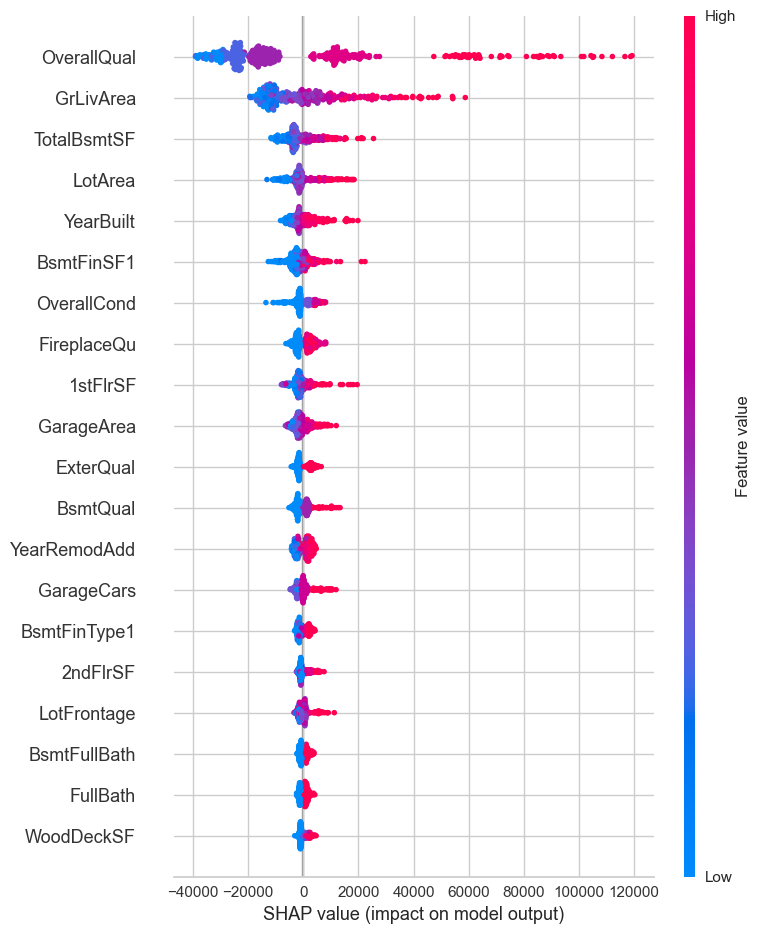

In [13]:
# This function only supports tree based models for binary classification: lightgbm, dt, et, rf
interpret_model(lightgbm)

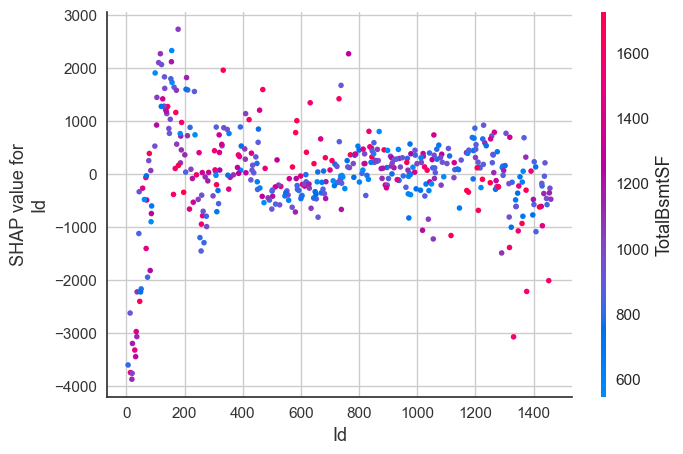

In [14]:
interpret_model(lightgbm, plot='correlation')

In [15]:
interpret_model(lightgbm, plot='reason', observation=12)

# AutoML
Function returns the best model out of all trained models in the current setup based on the optimize parameter.

In [16]:
automl()

# As in our above code the best model was also chosen the best model by AutoML()

GradientBoostingRegressor(random_state=123)

# Dashboard
Dashboard function generates the interactive dashboard for a trained model.

In [18]:
%pip install explainerdashboard

  Using cached explainerdashboard-0.4.5-py3-none-any.whl (287 kB)
  Using cached dtreeviz-2.2.2-py3-none-any.whl (91 kB)
  Using cached dash_bootstrap_components-1.5.0-py3-none-any.whl (221 kB)
  Using cached flask_simplelogin-0.1.2-py3-none-any.whl (7.2 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached oyaml-1.0-py2.py3-none-any.whl (3.0 kB)
  Using cached flask_wtf-1.2.1-py3-none-any.whl (12 kB)
  Using cached dash_auth-2.1.0-py3-none-any.whl (4.1 kB)
  Using cached jupyter_dash-0.4.2-py3-none-any.whl (23 kB)
  Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)
  Using cached pytest-8.0.0-py3-none-any.whl (334 kB)
  Using cached wtforms-3.1.2-py3-none-any.whl (145 kB)
  Using cached ansi2html-1.9.1-py3-none-any.whl (17 kB)
  Using cached iniconfig-2.0.0-py3-none-any.whl (5.9 kB)
  Using cached pluggy-1.4.0-py3-none-any.whl (20 kB)
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\joseg\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [12]:
dashboard(lightgbm, display_format='inline') #using lightgbm; some pycaret function don't support gbr

Generating self.shap_explainer = shap.TreeExplainer(model)
Building ExplainerDashboard..
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...
Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating shap interaction values...
Reminder: TreeShap computational complexity is O(TLD^2), where T is the number of trees, L is the maximum number of leaves in any tree and D the maximal depth of any tree. So reducing these will speed up the calculation.
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard inline (terminate it with ExplainerDashboard.terminate(8050))


# Predict model
Predict model function allows us to review the actual 'SalePrice' with the 'prediction_label'. Actual prices are very close to predicted.

In [8]:
pred_holdouts = predict_model(lightgbm)
pred_holdouts.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,...,Exterior_HdBoard,Exterior_MetalSd,Exterior_Plywood,Exterior_ImStucc,Exterior_CBlock,Exterior_Stucco,Exterior_BrkComm,Exterior_WdShing,SalePrice,prediction_label
666,668,1-STORY 1946+,RL,65.0,8125,NaN,0,Lvl,Inside,0,...,1,0,0,0,0,0,0,0,193500,198093.827418
633,635,DUPLEX,RL,64.0,6979,NaN,0,Lvl,Inside,0,...,0,0,1,0,0,0,0,0,144000,134182.646648
161,162,2-STORY 1946+,RL,110.0,13688,NaN,1,Lvl,Inside,0,...,0,0,0,0,0,0,0,0,412500,396561.795533
147,148,2-STORY 1946+,RL,NaN,9505,NaN,1,Lvl,CulDSac,0,...,0,0,0,0,0,0,0,0,222500,237265.526132
18,19,1-STORY 1946+,RL,66.0,13695,NaN,0,Lvl,Inside,0,...,0,0,0,0,0,0,0,0,159000,149762.460447


# Create app
Create a basic gradio app for inference

In [19]:
#%pip install gradio
%pip install gradio==3.50

  Attempting uninstall: gradio-client
    Found existing installation: gradio-client 0.8.1
    Uninstalling gradio-client-0.8.1:
      Successfully uninstalled gradio-client-0.8.1
  Attempting uninstall: gradio
    Found existing installation: gradio 4.16.0
    Uninstalling gradio-4.16.0:
      Successfully uninstalled gradio-4.16.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\joseg\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [15]:
help(create_app)

Help on function create_app in module pycaret.regression.functional:

create_app(estimator, app_kwargs: Optional[dict] = None) -> None
    This function creates a basic gradio app for inference.
    It will later be expanded for other app types such as
    Streamlit.
    
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> boston = get_data('boston')
    >>> from pycaret.regression import *
    >>> exp_name = setup(data = boston,  target = 'medv')
    >>> lr = create_model('lr')
    >>> create_app(lr)
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    app_kwargs: dict, default = {} (empty dict)
        arguments to be passed to app class.
    
    
    Returns:
        None



In [12]:
create_app(lightgbm)

# creation of the app is working; however I think that my dataset contains too may features; Will consider removing some of the less useful ones


Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\joseg\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\routes.py", line 534, in predict
    output = await route_utils.call_process_api(
  File "c:\Users\joseg\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\route_utils.py", line 226, in call_process_api
    output = await app.get_blocks().process_api(
  File "c:\Users\joseg\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\blocks.py", line 1550, in process_api
    result = await self.call_function(
  File "c:\Users\joseg\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\blocks.py", line 1185, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\joseg\AppData\Local\Programs\Python\Python39\lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "c:\Users\joseg\AppData\Local\Programs\Python\Python39\lib\site-packages\anyio\_

Traceback (most recent call last):
  File "c:\Users\joseg\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\routes.py", line 534, in predict
    output = await route_utils.call_process_api(
  File "c:\Users\joseg\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\route_utils.py", line 226, in call_process_api
    output = await app.get_blocks().process_api(
  File "c:\Users\joseg\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\blocks.py", line 1550, in process_api
    result = await self.call_function(
  File "c:\Users\joseg\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\blocks.py", line 1185, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\joseg\AppData\Local\Programs\Python\Python39\lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "c:\Users\joseg\AppData\Local\Programs\Python\Python39\lib\site-packages\anyio\_

# Create API
Function takes an input model and creates a POST API for inference.

In [21]:
# Create API
create_api(gbr, api_name = 'housing_price_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python housing_price_api.py


In [24]:
%pip install pydantic==1.10.12

# Downgrade pydantic 2.6.0; I was getting too many annotation type errors


  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.0
    Uninstalling pydantic-2.6.0:
      Successfully uninstalled pydantic-2.6.0
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\joseg\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [8]:
# Run API
!python housing_price_api.py

# NameError: name 'nan' is not defined - this error was being generated; I opened housing_price_api.py and edited the data line to removed the nan valued on some features.

# Alternately you can open and run the code in housing_price_api.py file to get more info.
"""
INFO:     Started server process [22896]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:80 (Press CTRL+C to quit)
INFO:     Shutting down
INFO:     Waiting for application shutdown.
INFO:     Application shutdown complete.
INFO:     Finished server process [22896]
"""

^C


'\nINFO:     Started server process [22896]\nINFO:     Waiting for application startup.\nINFO:     Application startup complete.\nINFO:     Uvicorn running on http://127.0.0.1:80 (Press CTRL+C to quit)\nINFO:     Shutting down\nINFO:     Waiting for application shutdown.\nINFO:     Application shutdown complete.\nINFO:     Finished server process [22896]\n'